In [6]:
#options related data and how to interpret them
#data used from option_chain method of yfinance library

import yfinance as yf
import matplotlib.pyplot as plt


#### Types of Trades with Options

- **Buying Calls:** You purchase a call option if you expect the stock price to rise. This gives you the right to buy the stock at the strike price before expiration.

- **Buying Puts:** You purchase a put option if you expect the stock price to fall. This gives you the right to sell the stock at the strike price before expiration.

- **Selling (Writing) Calls:** You sell a call option, collecting the premium, if you expect the stock price to stay the same or fall. If the price rises above the strike, you may have to sell the stock at the strike price.

- **Selling (Writing) Puts:** You sell a put option, collecting the premium, if you expect the stock price to stay the same or rise. If the price falls below the strike, you may have to buy the stock at the strike price.

- **Covered Call:** You own the underlying stock and sell a call option on it. This generates income but limits your upside if the stock rises above the strike.

- **Protective Put:** You own the underlying stock and buy a put option as insurance against a price drop.

- **Spreads:** You combine buying and selling options of the same type (calls or puts) with different strikes or expirations to limit risk and cost. Examples include vertical spreads, calendar spreads, and diagonal spreads.

- **Straddles and Strangles:** You buy both a call and a put (straddle: same strike; strangle: different strikes) to profit from large moves in either direction.

- **Iron Condor/Iron Butterfly:** Advanced strategies that combine multiple calls and puts to profit from low volatility and collect premiums.

These strategies allow traders to profit from different market conditions: rising, falling, or sideways prices, as well as changes in volatility.

#### Options Terminology
- **At-the-money (ATM):** An option whose strike price is exactly that of where the underlying is trading. ATM options have a delta of 0.50.

- **In-the-money (ITM):** An option with intrinsic value and a delta greater than 0.50. For a call, the strike price of an ITM option will be below the current price of the underlying; for a put, it'll be above the current price.
- **Out-of-the-money (OTM):** An option with only extrinsic (time) value and a delta less than 0.50. For a call, the strike price of an OTM option will be above the current price of the underlying; for a put, it'll be below the current price.
- **Premium:** The price paid for an option in the market.
- **Strike price:** The price at which you can buy or sell the underlying, also known as the exercise price.
- **Underlying:** The security upon which the option is based.
- **Implied volatility (IV):** The volatility of the underlying (how quickly and severely it moves) as revealed by market prices.
- **Exercise:** When an options contract owner exercises the right to buy or sell at the strike price. The seller is then said to be assigned.
- **Expiration:** The date at which the options contract expires, or ceases to exist. OTM options will expire worthless.

### option chains fields
- **contractSymbol**: The unique identifier for this specific option contract. It includes the ticker, expiration date, option type (call/put), and strike price.
- **lastTradeDate**: The date and time when this option contract was last traded.
- **strike**: The strike price—the price at which the option holder can buy (call) or sell (put) the underlying stock.
- **lastPrice**: The most recent price at which this option contract was traded.
- **bid**: The highest price a buyer is currently willing to pay for this option.
- **ask**: The lowest price a seller is currently willing to accept for this option.
- **change**: The difference between the last trade price and the previous day’s closing price for this contract.
- **percentChange**: The percentage change in the option’s price from the previous day’s close.
- **volume**: The number of contracts traded during the current trading day.
- **openInterest**: The total number of outstanding (not yet closed or exercised) contracts for this option.
- **impliedVolatility**: The market’s forecast of how much the underlying stock will move, expressed as an annualized percentage. Higher values mean the market expects more movement.
- **inTheMoney**: Whether the option would be profitable if exercised right now (True/False). For calls, this means the stock price is above the strike; for puts, below.
- **contractSize**: The number of shares each contract controls (usually 100 for US stocks).
- **currency**: The currency in which the option is priced (e.g., USD).



In [25]:
Ticker_Symbol = "PLTR"

tik = yf.Ticker(Ticker_Symbol)
expiration_dates = tik.options
print(expiration_dates)


('2025-11-07', '2025-11-14', '2025-11-21', '2025-11-28', '2025-12-05', '2025-12-12', '2025-12-19', '2026-01-16', '2026-02-20', '2026-03-20', '2026-04-17', '2026-05-15', '2026-06-18', '2026-08-21', '2026-09-18', '2026-11-20', '2026-12-18', '2027-01-15', '2027-06-17', '2027-12-17', '2028-01-21')


In [26]:
# get palantir stock data

tick = yf.Ticker(Ticker_Symbol)
historical_prices = tick.history(period="max")
historical_prices.reset_index(inplace=True)


In [27]:
tick_options = tick.option_chain(expiration_dates[0])
df_calls = tick_options.calls
df_puts = tick_options.puts
df_calls.head()


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,PLTR251107C00095000,2025-11-05 17:40:55+00:00,95.0,90.76,90.30,91.25,-4.549995,-4.773891,478,699,0.000010,True,REGULAR,USD
1,PLTR251107C00100000,2025-11-05 17:38:50+00:00,100.0,86.20,85.30,86.35,-2.550003,-2.873243,64,557,2.835940,True,REGULAR,USD
2,PLTR251107C00105000,2025-11-05 17:33:34+00:00,105.0,81.25,80.30,81.30,-4.129997,-4.837195,60,43,2.406254,True,REGULAR,USD
3,PLTR251107C00110000,2025-11-05 17:33:34+00:00,110.0,76.31,75.45,76.20,-1.930000,-2.466769,67,58,0.000010,True,REGULAR,USD
4,PLTR251107C00115000,2025-11-05 17:32:19+00:00,115.0,70.27,69.65,71.85,-2.580002,-3.541526,35,29,2.986331,True,REGULAR,USD


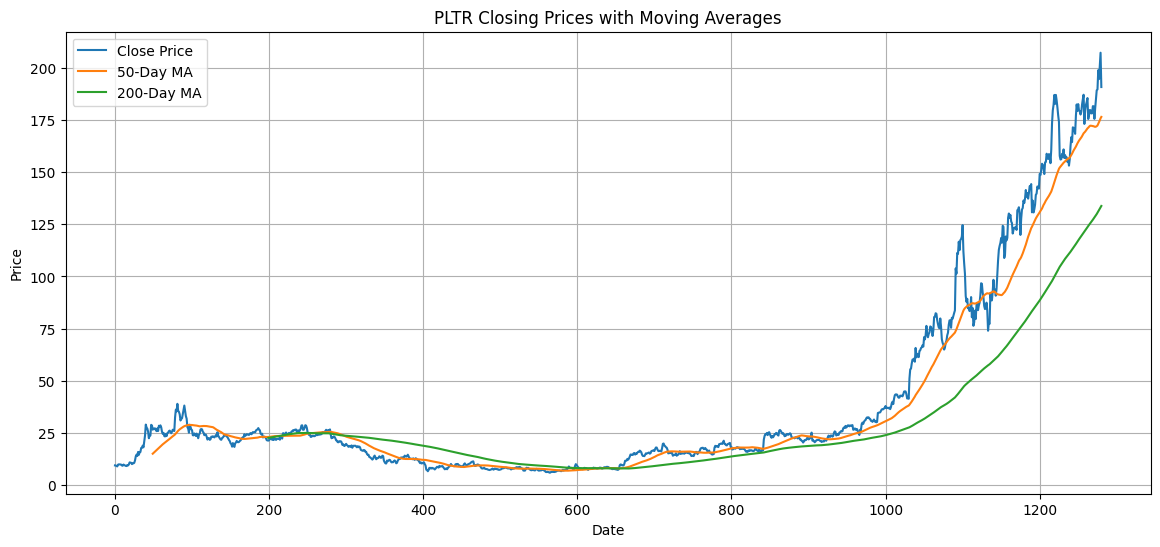

Available Expiration Dates: ('2025-11-07', '2025-11-14', '2025-11-21', '2025-11-28', '2025-12-05', '2025-12-12', '2025-12-19', '2026-01-16', '2026-02-20', '2026-03-20', '2026-04-17', '2026-05-15', '2026-06-18', '2026-08-21', '2026-09-18', '2026-11-20', '2026-12-18', '2027-01-15', '2027-06-17', '2027-12-17', '2028-01-21')


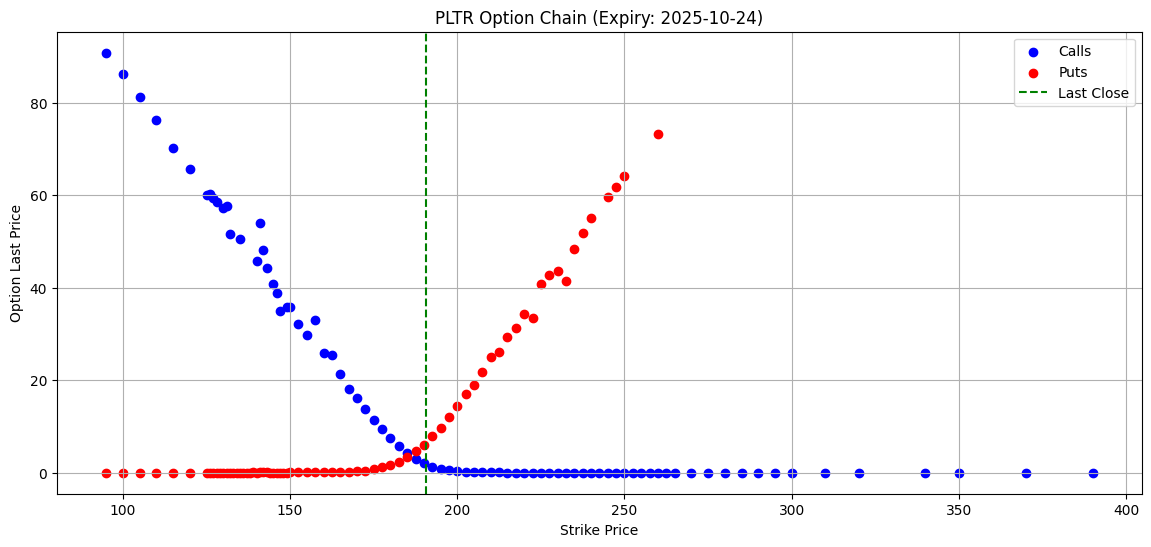

In [28]:

# add moving averages 50 and 200 days
historical_prices['MA50'] = historical_prices['Close'].rolling(window=50).mean()
historical_prices['MA200'] = historical_prices['Close'].rolling(window=200).mean()
plt.figure(figsize=(14, 6))
plt.plot(historical_prices.index, historical_prices["Close"], label="Close Price")
plt.plot(historical_prices.index, historical_prices["MA50"], label="50-Day MA")
plt.plot(historical_prices.index, historical_prices["MA200"], label="200-Day MA")
plt.title(f"{Ticker_Symbol} Closing Prices with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# get all expiration dates for options
expiration_dates = tick.options
print("Available Expiration Dates:", expiration_dates)
# get the mostr recent expiration date
most_recent_expiry = expiration_dates[0]
# Plot option chain strikes vs last close


ticker_options = tick.option_chain(most_recent_expiry)
last_close = historical_prices["Close"].iloc[-1]
calls = ticker_options.calls
puts = ticker_options.puts

plt.figure(figsize=(14, 6))
plt.scatter(calls['strike'], calls['lastPrice'], color='blue', label='Calls')
plt.scatter(puts['strike'], puts['lastPrice'], color='red', label='Puts')
plt.axvline(last_close, color='green', linestyle='--', label='Last Close')
plt.title(f"{Ticker_Symbol} Option Chain (Expiry: 2025-10-24)")
plt.xlabel("Strike Price")
plt.ylabel("Option Last Price")
plt.legend()
plt.grid(True)
plt.show()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,NVDA251107C00050000,2025-10-31 18:28:17+00:00,50.0,154.35,155.80,157.90,0.000000,0.00000,1.0,26,7.458985,True,REGULAR,USD
1,NVDA251107C00055000,2025-10-31 14:41:19+00:00,55.0,151.19,150.80,152.90,0.000000,0.00000,5.0,5,6.976564,True,REGULAR,USD
2,NVDA251107C00060000,2025-10-31 18:13:07+00:00,60.0,143.57,145.60,147.95,0.000000,0.00000,1.0,1,6.597658,True,REGULAR,USD
3,NVDA251107C00065000,2025-10-31 14:42:43+00:00,65.0,141.25,140.85,142.95,0.000000,0.00000,20.0,20,3.750001,True,REGULAR,USD
4,NVDA251107C00070000,2025-11-03 20:35:46+00:00,70.0,135.51,135.85,137.95,2.860001,2.15605,6.0,52,3.500001,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,NVDA251107C00360000,2025-10-30 18:11:49+00:00,360.0,0.01,0.00,0.01,0.000000,0.00000,1.0,10,1.562502,False,REGULAR,USD
82,NVDA251107C00380000,2025-10-29 13:30:01+00:00,380.0,0.01,0.00,0.01,0.000000,0.00000,3.0,51,1.718751,False,REGULAR,USD
83,NVDA251107C00390000,2025-10-28 19:43:03+00:00,390.0,0.01,0.00,0.01,0.000000,0.00000,12.0,13,1.812501,False,REGULAR,USD
84,NVDA251107C00400000,2025-11-03 14:30:04+00:00,400.0,0.01,0.00,0.01,0.000000,0.00000,1.0,38,1.875001,False,REGULAR,USD


TypeError: unsupported operand type(s) for /: 'tuple' and 'int'

In [37]:
1*60*60*24

86400